In [1]:
from dotenv import load_dotenv

_ = load_dotenv()

In [93]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Annotated, List
import operator
# from langgraph.checkpoint.sqlite import SqliteSaver
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, AIMessage, ChatMessage

from langgraph.checkpoint.memory import MemorySaver

from langchain_openai import ChatOpenAI

In [109]:
import time
from datetime import datetime
from pathlib import Path
import os
from io import BytesIO


In [4]:
screenshot_dir = os.path.abspath('screenshots')

In [94]:
model = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

In [48]:
class AgentState(TypedDict):
    itr: int
    max_itr: int

In [49]:
def initial_wait(state: AgentState):
    print("Sleeping for 2 seconds")
    time.sleep(2)
    return {}
    

In [50]:
def screen_grab(state:AgentState):
    model.
    print("Taking a screenshot...")
    current_dt = datetime.today()
    current_dt = current_dt.strftime("%Y-%m-%d_%H:%M:%S")
    file_name = 'screenshot%s.png' % (datetime.now().strftime('%Y-%m%d_%H-%M-%S-%f'))
    file_path = Path(screenshot_dir, f"{file_name}")
    screen_grab = pyautogui.screenshot()
    screen_grab.save(file_path)

    return {"itr": state.get("itr", 0) + 1}

In [68]:
def should_continue(state:AgentState):
    if state['itr'] > state["max_itr"]:
        return END
    return "wait"
    

In [82]:
builder = StateGraph(AgentState)

In [83]:
builder.add_node("wait", initial_wait)
builder.add_node("screen_grab", screen_grab)
# builder.add_edge("continue", should_continue)

In [84]:
builder.set_entry_point("wait")

In [85]:
builder.add_conditional_edges("screen_grab", should_coninue, {END: END, "wait" : "wait"})

In [86]:
builder.add_edge("wait", "screen_grab")
# builder.add_edge("screengrab", "continue")

In [87]:
builder

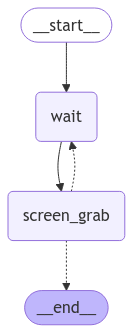

In [88]:
builder.compile()

In [91]:
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)
thread = {"configurable": {"thread_id": "1"}}


In [92]:
graph.invoke({
    'itr': 0,
    'max_itr': 3
}, thread)

Sleeping for 2 seconds
Taking a screenshot...
Sleeping for 2 seconds
Taking a screenshot...
Sleeping for 2 seconds
Taking a screenshot...
Sleeping for 2 seconds
Taking a screenshot...


{'itr': 4, 'max_itr': 3}

### Creating Custom Screenshot Tool

In [99]:
# Import things that are needed generically
from langchain.pydantic_v1 import BaseModel, Field
from langchain.tools import BaseTool, StructuredTool, tool
import base64

In [110]:
def screen_grab():
    current_dt = datetime.today()
    current_dt = current_dt.strftime("%Y-%m-%d_%H:%M:%S")
    file_name = 'screenshot%s.png' % (datetime.now().strftime('%Y-%m%d_%H-%M-%S-%f'))
    file_path = Path(screenshot_dir, f"{file_name}")
    screen_grab = pyautogui.screenshot()    
    buffered = BytesIO()
    screen_grab.save(buffered, format="PNG")
    img_b64 = base64.b64encode(buffered.getvalue())
    return img_b64

In [111]:
screen_grabber = StructuredTool.from_function(
    func=screen_grab,
    name="Screen Capture",
    description="Take screenshot of the current screen",
    return_direct=True
)
    

In [114]:
screen_grabber.run("")

b'iVBORw0KGgoAAAANSUhEUgAAC3wAAAd4CAYAAADWCS9iAAAMQWlDQ1BJQ0MgUHJvZmlsZQAAeJyVVwdYU8kWnluSkEBoAQSkhN4EASkBpITQAkjvNkISIJQYA0HFXhYVXAsqomBDV0UUrIDYEcXCotj7goiKsi4W7MqbFNB1X/nefN/c+e8/Z/5z5tyZe+8AoHaKIxLloOoA5ArzxTHB/vSk5BQ6qReggAS0gAEw43DzRMyoqHAAy1D79/LuJkCk7TV7qdY/+/9r0eDx87gAIFEQp/HyuLkQHwIAr+SKxPkAEKW82bR8kRTDCrTEMECIl0hxhhxXSnGaHO+T2cTFsCBuAUBJhcMRZwCgegXy9AJuBtRQ7YfYUcgTCAFQo0Psk5s7hQdxKsTW0EYEsVSfkfaDTsbfNNOGNTmcjGEsn4usKAUI8kQ5nBn/Zzr+d8nNkQz5sIRVJVMcEiOdM8zb7ewpYVKsAnGfMC0iEmJNiD8IeDJ7iFFKpiQkXm6PGnDzWDBnQAdiRx4nIAxiA4iDhDkR4Qo+LV0QxIYYrhB0uiCfHQexLsRL+HmBsQqbLeIpMQpfaH26mMVU8Oc5Yplfqa+Hkux4pkL/dSafrdDHVAsz4xIhpkBsXiBIiIBYFWKHvOzYMIXN2MJMVsSQjVgSI43fHOIYvjDYX66PFaSLg2IU9sW5eUPzxbZkCtgRCnwgPzMuRJ4frIXLkcUP54Jd4QuZ8UM6/Lyk8KG58PgBgfK5Y8/4wvhYhc4HUb5/jHwsThHlRCnscVN+TrCUN4XYJa8gVjEWT8iHC1Kuj6eL8qPi5HHihVmc0Ch5PPhKEA5YIADQgQTWNDAFZAFBe19DH7yT9wQBDhCDDMAH9gpmaESirEcIr7GgEPwJER/kDY/zl/XyQQHkvw6z8qs9SJf1FshGZIMnEOeCMJAD7yWyUcJhbwngMWQE//DOgZUL482BVdr/7/kh9jvDhEy4gpEMeaSrDVkSA4kBxBBiEN

In [116]:
class AgentState(TypedDict):
    itr: int
    max_itr: int

In [ ]:
def initial_wait(state: AgentState):
    print("Sleeping for 2 seconds")
    time.sleep(2)
    return {}

def research(state:AgentState):
    model.
    print("Taking a screenshot...")
    current_dt = datetime.today()
    current_dt = current_dt.strftime("%Y-%m-%d_%H:%M:%S")
    file_name = 'screenshot%s.png' % (datetime.now().strftime('%Y-%m%d_%H-%M-%S-%f'))
    file_path = Path(screenshot_dir, f"{file_name}")
    screen_grab = pyautogui.screenshot()
    screen_grab.save(file_path)

    return {"itr": state.get("itr", 0) + 1}